In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Read in the dataset:

In [270]:
train_df = pd.read_csv("../datasets/train.csv")

# Investigate the data:

### "Train" dataset:

In [271]:
train_df.shape

(2051, 81)

In [272]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [273]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

# Clean the data:

***Format the Column Names:***

In [274]:
def format_col(df):
    # To lowercase
    df.columns = map(str.lower, df.columns)  # <-- Referenced: https://chrisalbon.com/python/data_wrangling/pandas_lowercase_column_names/
    
    # Remove spaces, add "_":
    df.columns = df.columns.str.replace(" ", "_")
    
    
format_col(train_df)

train_df.rename(columns={"saleprice": "sale_price"}, inplace=True)

### NaN's

In [275]:
train_df.isna().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
sale_price        0
Length: 81, dtype: int64

In [276]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [277]:
# garage, bsmt have complicated setup to indicate they have or do not have garage/bsmt
# Could engineer a new col indicate if they merely have garage/bsmt

# Bsmt = finished vs. unfinished.

***fence***

In [278]:
# 400 non-null, NO NA listed in values_count
# add 0/ NA value?
train_df["fence"].fillna("NA", inplace=True)
train_df["fence"].value_counts()

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

***bsmt cols***
- May be best to not include bsmt cols in the model, as there is a lot of discrepancy in the nan counts between cols
- Or, drop the 1 nan value in the col, and use that data (to indicate if has a basement, or create a has bsmt/ does not col)

In [279]:
# Total bsmt sq feet
# print(train_df.loc[train_df["total_bsmt_sf"].isna()])  # row 1327
train_df["total_bsmt_sf"].isna().sum()
train_df["total_bsmt_sf"].value_counts()
train_df["total_bsmt_sf"].dropna(inplace=True)
# train_df[train_df["total_bsmt_sf"].dropna(inplace=True)]

In [280]:
train_df["total_bsmt_sf"].isna().sum()

0

***misc cols***

In [281]:
# Total $0 misc values
train_df["misc_val"].value_counts()

# Number of nan in this col is equal to 0 above, can convert to type na
train_df["misc_feature"].isna().sum()

train_df["misc_feature"].unique()

train_df["misc_feature"].fillna("NA", inplace=True)
train_df["misc_feature"].isna().sum()

0

***pool cols***

- All nan in pool_qc corresponding to NA pool in pool_area, where pool_area was size 0.

In [282]:
print(train_df["pool_area"].value_counts())
print(train_df["pool_qc"].value_counts())

train_df["pool_qc"].fillna("NA", inplace=True)
train_df["pool_qc"].isna().sum()

0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: pool_area, dtype: int64
Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64


0

***mas_vr_type***

In [283]:
# The NaN could be equal to the Cinder Block type.
# Not much of anything to back this up though.
# Both are missing 22 values. Even if Type is changed to CBlock,
# no way of knowing the values for the area. Best to not to change value

train_df["mas_vnr_type"].dropna(inplace=True)
train_df["mas_vnr_area"].dropna(inplace=True)

train_df["mas_vnr_type"].isna().sum()

0

***lot_frontage***

In [284]:
# train_df.loc[train_df["lot_frontage"].isna()]  # <-- No linear feet of street connected to property?
# This could maybe just be == 0? The other lot metrics have no NaN values.

# May need to drop these, instead.
train_df["lot_frontage"].dropna(inplace=True)

In [285]:
train_df["lot_frontage"].isna().sum()

0

In [286]:
train_df.isna().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
sale_price        0
Length: 81, dtype: int64

***alley***

In [287]:
# Fix alley col
# No NA values listed, although supposed to be in the value counts
train_df["alley"].fillna("NA", inplace=True)

train_df["alley"].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

***garage cols***

In [351]:
train_df["garage_area"].dropna(axis=0, inplace=True)

In [352]:
train_df["garage_area"].isna().sum()

0

In [353]:
train_df["garage_area"].shape

(2050,)

***fireplace***

In [290]:
# If the number of units with 0 fireplaces == the number of nans in the fireplace_qu col, change to "NA"
# train_df["fireplace_qu"].unique()
# train_df["fireplaces"].unique()  
# train_df["fireplace_qu"].isna().sum()
# (train_df["fireplaces"] == 0).sum()

train_df["fireplace_qu"].fillna("NA", inplace=True)

train_df["fireplace_qu"].isna().sum()

0

***bsmt baths***
- Cannot tell if the nan rows should be zeroed or not...will be dropped.

In [291]:
train_df["bsmt_full_bath"].isna().sum()

train_df["bsmt_full_bath"].value_counts()

train_df["bsmt_half_bath"].isna().sum()

train_df["bsmt_half_bath"].value_counts()

train_df["bsmt_full_bath"].dropna(inplace=True)

train_df["bsmt_half_bath"].dropna(inplace=True)

### Convert Col type:

In [292]:
# Change lot area to type float
def col_to_float(df, col):
    return df[col].astype("float")

# train_df["lot_area"] = col_to_float(train_df, "lot_area")

In [293]:
# Change bsmt_full_bath to int, its discrete
def col_to_int(df, col):
    return df[col].astype("int")

# train_df["bsmt_full_bath"] = col_to_int(train_df, "bsmt_full_bath")

In [294]:
def col_to_str(df, col):
    return df[col].astype("object")

# train_df["ms_subclass"] = col_to_str(train_df, "bsmt_full_bath")

In [295]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

### Save the Clean CSV:

In [296]:
train_df.to_csv("../datasets/clean_train.csv")

# Feature Engineering

### Create Age of House Column.
- From the heatmaps and correlations charted above, we have reason to believe that the year a house was built could strongly correlate to the sale price of the house. Below we'll engineer a new "house_age" column to store the ages of the houses.
- This will be age of the house at the time for the year when it was built.
    - Therefore, will be equal to year sold - year built
- As the year of that the unit was built increases, the build year *seems* to have a positive linear relationship with the sale price of the unit.
    - Inversely, as the age (build year - year of sale) increases, the age *seems* to have a negative linear relationship with the sale price of the unit.

In [298]:
train_df["parcel_age"] = train_df["yr_sold"] - train_df["year_built"]

In [299]:
train_df["parcel_age"].head()

0     34
1     13
2     57
3      4
4    110
Name: parcel_age, dtype: int64

# EDA

In [301]:
train_df.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_price,parcel_age
id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398,0.021998
pid,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052,0.347026
ms_subclass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335,-0.037371
lot_frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842,-0.109003
lot_area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566,-0.037242
overall_qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207,-0.602804
overall_cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019,0.372651
year_built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849,-0.999057
year_remod/add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370,-0.626569
mas_vnr_area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230,-0.330224


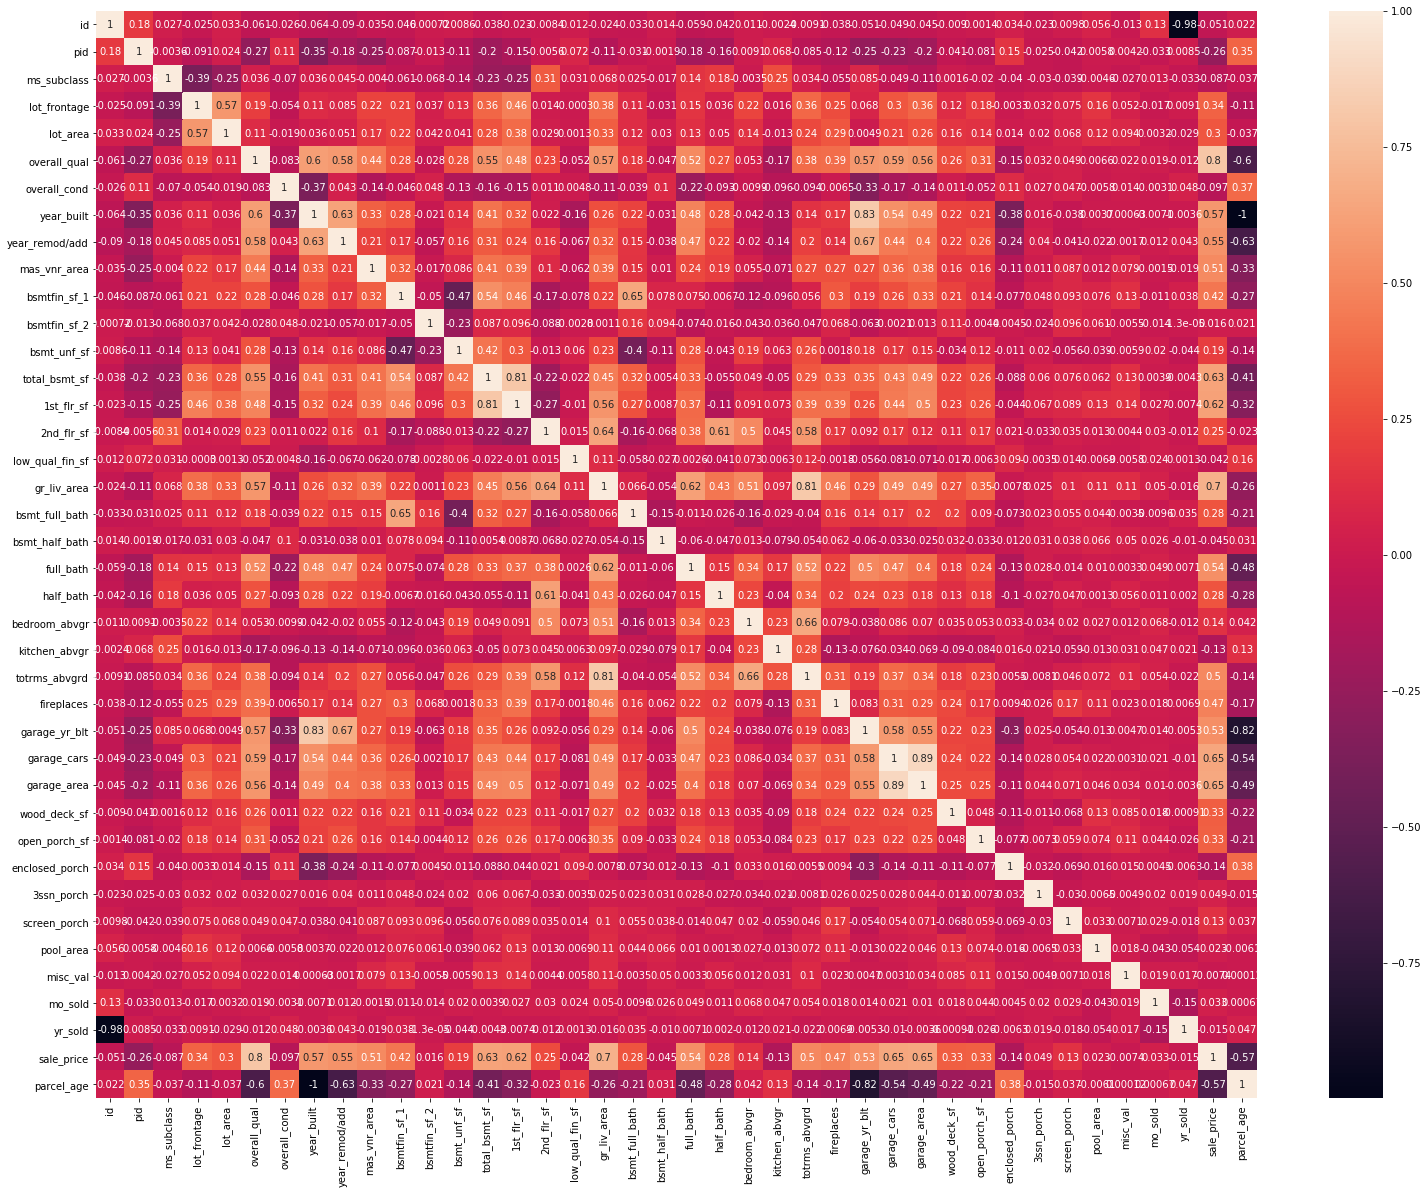

In [302]:
plt.figure(figsize=(26, 20))

sns.heatmap(train_df.corr(),
            annot=True);

In [303]:
train_df.corr()[["sale_price"]]

,sale_price
id,-0.051398
pid,-0.255052
ms_subclass,-0.087335
lot_frontage,0.341842
lot_area,0.296566
overall_qual,0.800207
overall_cond,-0.097019
year_built,0.571849
year_remod/add,0.550370
mas_vnr_area,0.512230


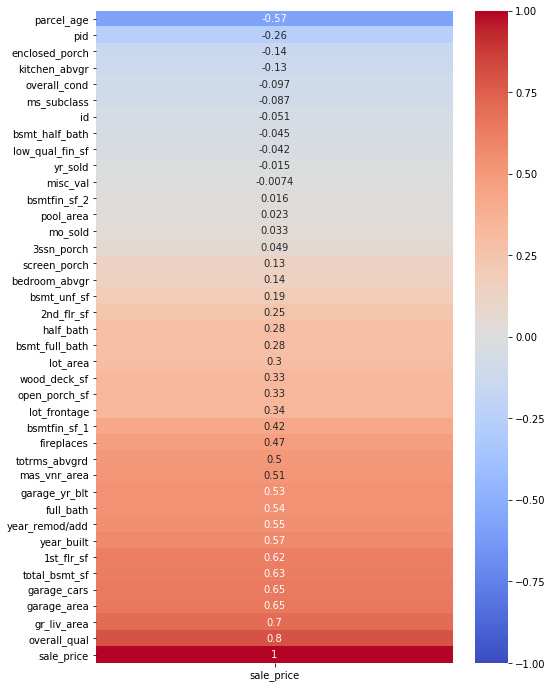

In [327]:
# Heatmap - credit instructor Riley D. from lecture 3.07
plt.figure(figsize=(8, 12))

sns.heatmap(train_df.corr()[["sale_price"]].sort_values("sale_price"),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1);


In [350]:
print(f"overall_qual: {train_df['overall_qual'].isna().sum()}")
print(f"gr_liv_area: {train_df['gr_liv_area'].isna().sum()}")
print(f"1st_flr_sf: {train_df['1st_flr_sf'].isna().sum()}")
print(f"total_bsmt_sf: {train_df['total_bsmt_sf'].isna().sum()}")
print(f"parcel_age: {train_df['parcel_age'].isna().sum()}")
print(f"garage_area: {train_df['garage_area'].isna().sum()}")

overall_qual: 0
gr_liv_area: 0
1st_flr_sf: 0
total_bsmt_sf: 1
parcel_age: 0
garage_area: 0


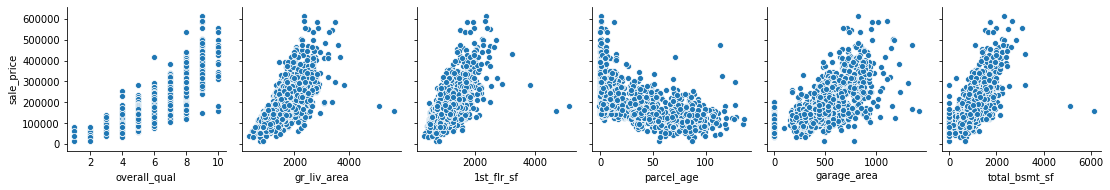

In [306]:
# Pairplots of the top 5 highest corr from heatmap above (less bsmt and garage cols):
sns.pairplot(train_df,
             x_vars=["overall_qual",
                     "gr_liv_area",
                     "1st_flr_sf",
                     "parcel_age",
                     "garage_area",
                     "total_bsmt_sf"],
             y_vars=["sale_price"]);

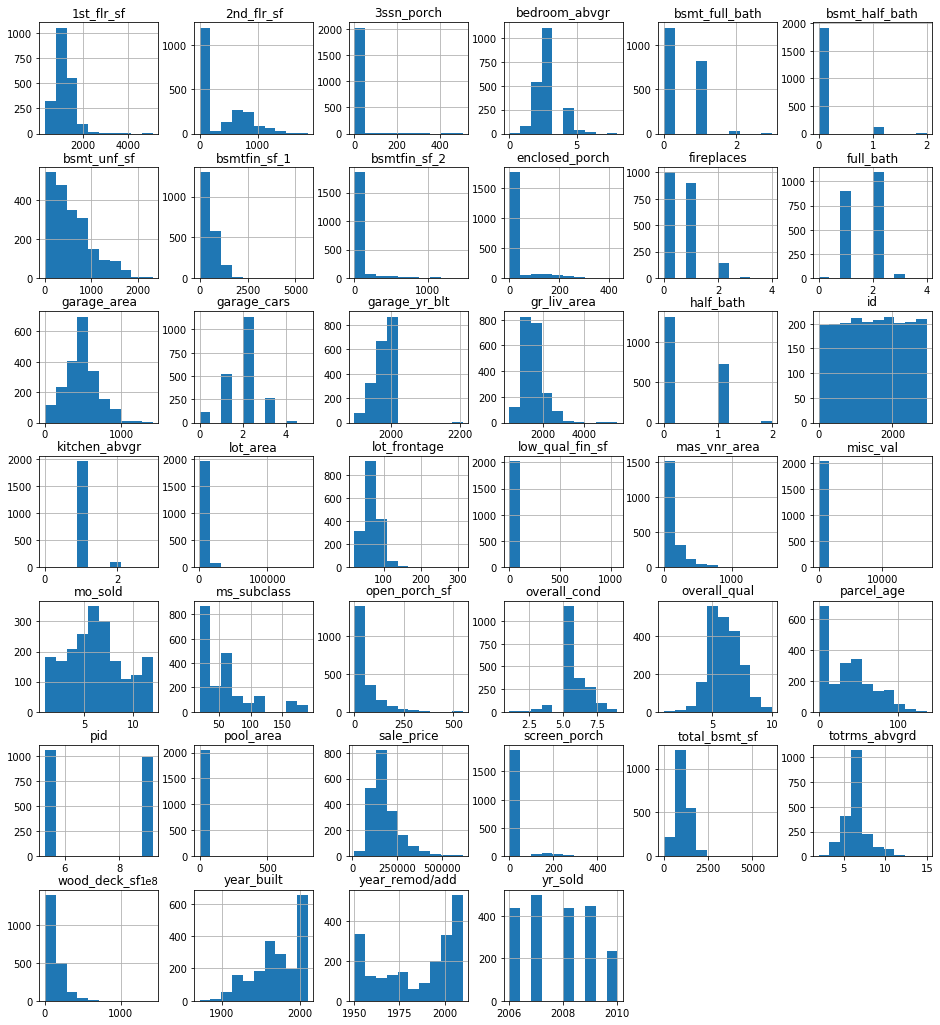

In [307]:
# Dist plots of all numeric:
train_df.hist(figsize=(16, 18));

### Boxplots: Checking for outliers

***Overall Quality of the House***
- One outlier on the left/ min side

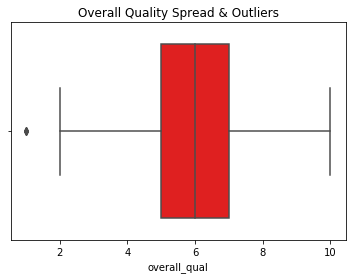

In [308]:
sns.boxplot(train_df["overall_qual"],
            color="red")

plt.title("Overall Quality Spread & Outliers");

In [309]:
# Outliers:
train_df["overall_qual"].min()

1

In [310]:
train_df["overall_qual"].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

***Above Ground Living Area***
- Many outliers on the right.

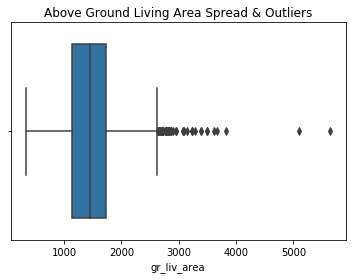

In [311]:
sns.boxplot(train_df["gr_liv_area"])

plt.title("Above Ground Living Area Spread & Outliers");

In [312]:
train_df["gr_liv_area"].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

***1 Floot Square Feet***
- Many outliers on the right of the plot

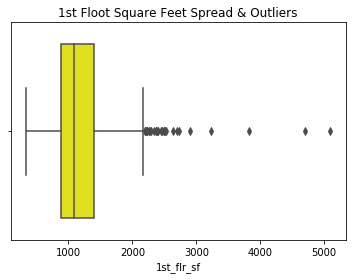

In [313]:
sns.boxplot(train_df["1st_flr_sf"],
            color="yellow")
plt.title("1st Floot Square Feet Spread & Outliers");

In [314]:
train_df["1st_flr_sf"].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

***Garage Area***
- No outliers, all data explained in the boxplot above

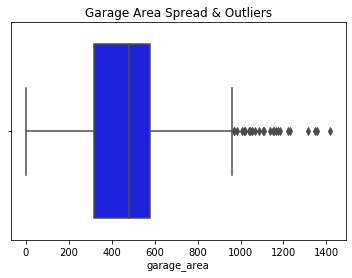

In [315]:
sns.boxplot(train_df["garage_area"],
            color="blue")

plt.title("Garage Area Spread & Outliers");

In [316]:
train_df["garage_area"].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

***Total BSMT Sq Feet***

Text(0.5, 1.0, 'Total Sq Feet of Basement')

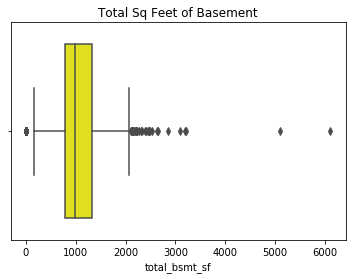

In [317]:
sns.boxplot(train_df["total_bsmt_sf"],
            color="yellow")

plt.title("Total Sq Feet of Basement")

In [318]:
train_df["total_bsmt_sf"].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

***Parcel Age***

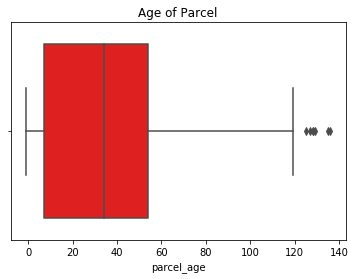

In [319]:
sns.boxplot(train_df["parcel_age"],
            color="red")

plt.title("Age of Parcel");

In [320]:
train_df["parcel_age"].describe()  # a -1 for age min? Need to be investigate.

count    2051.000000
mean       36.066797
std        30.211061
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: parcel_age, dtype: float64

# 1st Model: 

***Create features X and y:***

In [354]:
features = train_df[["overall_qual", "gr_liv_area", "1st_flr_sf", "garage_area", "total_bsmt_sf", "parcel_age"]]
X = features
y =train_df["sale_price"]

In [360]:
X["garage_area"].isna().sum()

1

In [355]:
X.head()

,overall_qual,gr_liv_area,1st_flr_sf,garage_area,total_bsmt_sf,parcel_age
0,6,1479,725,475.0,725.0,34
1,7,2122,913,559.0,913.0,13
2,5,1057,1057,246.0,1057.0,57
3,5,1444,744,400.0,384.0,4
4,6,1445,831,484.0,676.0,110


In [356]:
X.isna().sum()

overall_qual     0
gr_liv_area      0
1st_flr_sf       0
garage_area      1
total_bsmt_sf    1
parcel_age       0
dtype: int64

***Train/Test Split***

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

***Create an Instance of The Model:***

In [358]:
lr = LinearRegression()

***Fit the Model:***

In [359]:
lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

***Cross Validation:***

In [326]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)

/Users/patrickmccaul/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/Users/patrickmccaul/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Fit the Model:

In [1]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

### Evaluate the Model:

In [ ]:
# Train score
model.score(X_train, y_train)

# Test score
model.score(X_test, y_test)

# Cross val score
cross_val_score(model, X_train, y_train, cv=5).mean()

# Random / Old

# Notes (Prior to cleaning):

### Differences between the sets:

- The test contains 1 less column than train: test does not contain "SalePrice"
    - The "SalesPrice" column contains all <b><i>"except for the target that we are trying to predict in our Regression model."</i></b>
- ~~The column names in both sets will need to be reformatted, to make them easier to work with.~~
    - <b>A function can be used to iterate through and automate necessary changes.</b>
- What are the missing values?
    - How many values should each col contain, including na?
        - <b>Train: 2051 rows
        - Test: 878 rows</b>
    - What cols have missing values?
        - <b>Train: there are 26 cols with NaN
        - Test: there are 19 cols with NaN</b>
    - What do these missing values mean?
        - <b>Missing values in some cols will mean an amenity or feature is not present at that particular parcel (i.e. does not have a pool, or garage, or fireplace, etc).
        - For the BSMT sq foot cols, NaN could be problematic. Does this unit not have a basement?
        - Could just lump these metrics all in together, as "has basement or not"</b>
- Variable types info (available via the "data description":
    - <b>Nominal: Named, categorical
        - nominal vars do not contribute to the LR (check in objects or not)
    - Ordinal: named, ranked
    - Discrete: dates, # full/half bathrooms, # bedrooms, # kitchens, # rooms 
    - Continuous: size (sq footage), $ value of misc. feature, SALE PRICE</b>
- Identify Outliers:
    - <b>Approach: (Could use a function for this)
        - Find 50, 25, and 75%'s for dataset
        - Anything < 1.5 * the IQR under Q1, or
        - Anything > 1.5 * the IQR above Q3</b>
- Age of house?

### Train Data:
- Lot area is continuous, == the size. Float would be better suited for this
- Dummies?:
    - MS Zoning
    - Street
    - Alley
    - Conditions 1 and 2
- NaN:
    - Alley type NaN can be converted to NA, as per the data doc